# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
import requests
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}weather?q={city}&appid=9445df000964e24b23c7c566b1ba8ce2'

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | imbituba
Processing Record 3 of Set 1 | labrador city
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | talcahuano
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | petropavlovsk-kamchatsky
Processing Record 8 of Set 1 | yuanlin
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | kencong
Processing Record 12 of Set 1 | port mathurin
Processing Record 13 of Set 1 | ust-nera
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | san patricio
Processing Record 16 of Set 1 | quepos
Processing Record 17 of Set 1 | colonia
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | weno
Processing Record 22 of Set 1 | al 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,288.61,90,100,4.47,NZ,1702167411
1,imbituba,-28.2400,-48.6703,295.29,83,100,4.20,BR,1702167411
2,labrador city,52.9463,-66.9114,263.10,73,75,1.54,CA,1702167411
3,adamstown,-25.0660,-130.1015,294.87,78,100,4.76,PN,1702167412
4,talcahuano,-36.7167,-73.1167,289.97,63,0,5.66,CL,1702167412


In [8]:
# Export the City_Data into a csv
import os

# Specify the directory
output_data_dir = "output_data"

# Create the 'output_data' directory if it doesn't exist
os.makedirs(output_data_dir, exist_ok=True)

# Export the City_Data into a CSV file
city_data_df.to_csv(os.path.join(output_data_dir, "cities.csv"), index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,288.61,90,100,4.47,NZ,1702167411
1,imbituba,-28.2400,-48.6703,295.29,83,100,4.20,BR,1702167411
2,labrador city,52.9463,-66.9114,263.10,73,75,1.54,CA,1702167411
3,adamstown,-25.0660,-130.1015,294.87,78,100,4.76,PN,1702167412
4,talcahuano,-36.7167,-73.1167,289.97,63,0,5.66,CL,1702167412


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

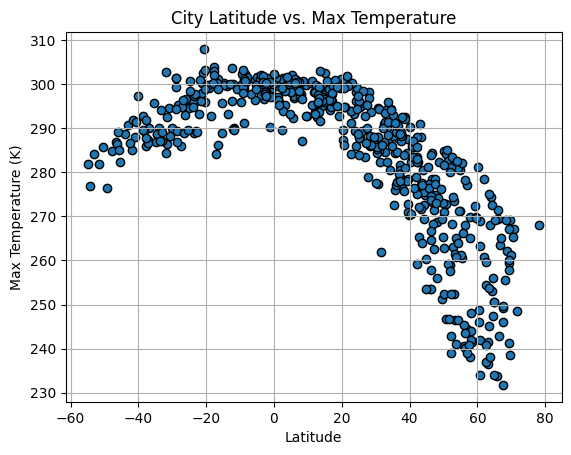

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

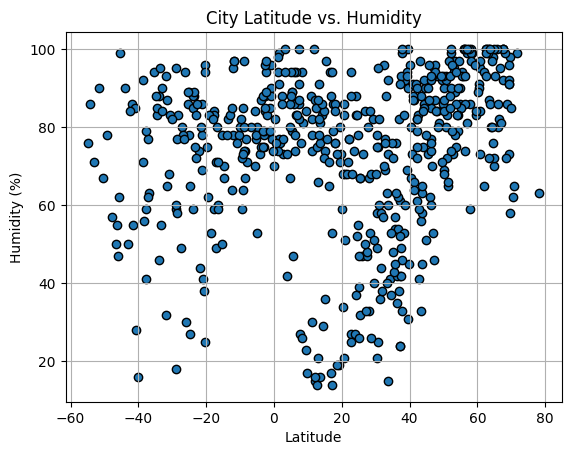

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

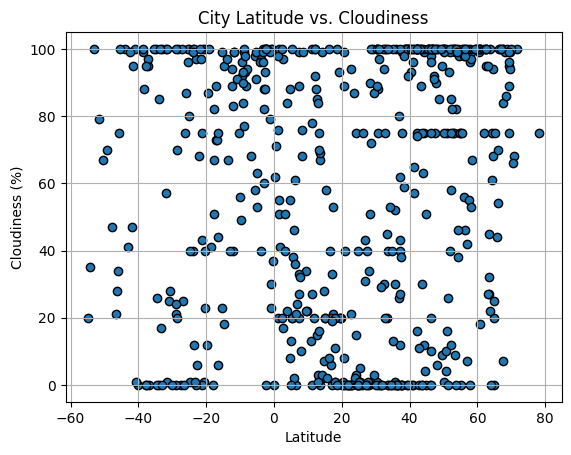

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

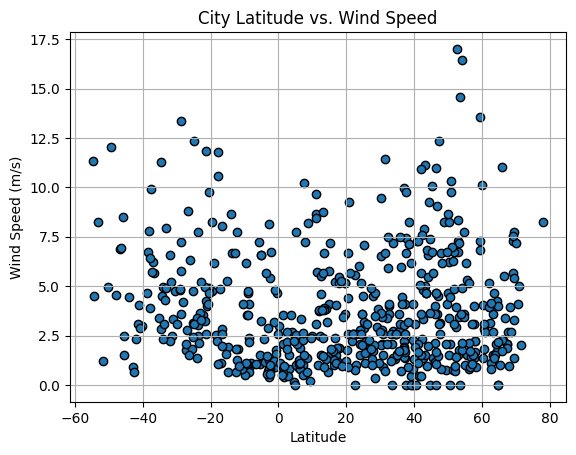

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, x_label, y_label, file_name):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Calculate regression line values
    regress_values = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolors="black")

    # Plot regression line
    plt.plot(x_values, regress_values, "r-", label="y = {:.2f}x + {:.2f}".format(slope, intercept))

    # Annotate linear regression equation
    equation_text = f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}\nR-squared: {r_value**2:.2f}"
    plt.annotate(equation_text, xy=(min(x_values), min(y_values)), fontsize=12, color="red")

    # Incorporate other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)

    # Save the figure
    plt.savefig(file_name)

    # Show plot
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,labrador city,52.9463,-66.9114,263.10,73,75,1.54,CA,1702167411
5,yellowknife,62.4560,-114.3525,254.54,100,95,3.14,CA,1702166882
6,petropavlovsk-kamchatsky,53.0452,158.6483,273.48,95,75,6.71,RU,1702167413
7,yuanlin,30.4151,112.8859,287.11,58,100,6.53,CN,1702167414
9,albany,42.6001,-73.9662,282.38,83,100,1.34,US,1702167322


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,288.61,90,100,4.47,NZ,1702167411
1,imbituba,-28.2400,-48.6703,295.29,83,100,4.20,BR,1702167411
3,adamstown,-25.0660,-130.1015,294.87,78,100,4.76,PN,1702167412
4,talcahuano,-36.7167,-73.1167,289.97,63,0,5.66,CL,1702167412
8,margaret river,-33.9500,115.0667,290.15,46,0,4.95,AU,1702167415


###  Temperature vs. Latitude Linear Regression Plot

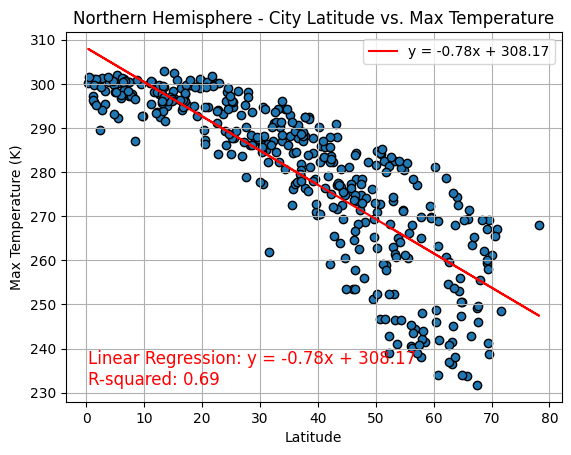

In [17]:
# Linear regression on Northern Hemisphere - Temperature vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Northern Hemisphere - City Latitude vs. Max Temperature",
                       "Latitude", "Max Temperature (K)",
                       "output_data/Northern_Hemi_Regression_Temperature.png")


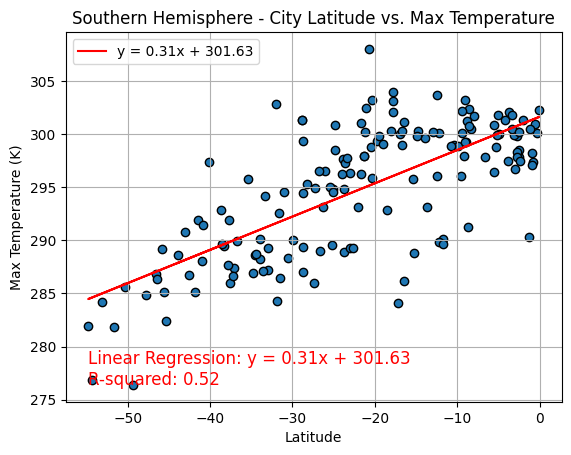

In [18]:
# Linear regression on Southern Hemisphere - Temperature vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Southern Hemisphere - City Latitude vs. Max Temperature",
                       "Latitude", "Max Temperature (K)",
                       "output_data/Southern_Hemi_Regression_Temperature.png")


**Discussion about the linear relationship:** Moderate positive correlation

### Humidity vs. Latitude Linear Regression Plot

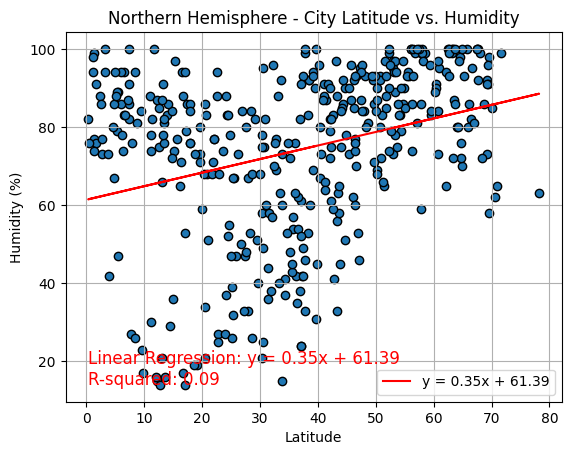

In [19]:
# Linear regression on Northern Hemisphere - Humidity vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Northern Hemisphere - City Latitude vs. Humidity",
                       "Latitude", "Humidity (%)",
                       "output_data/Northern_Hemi_Regression_Humidity.png")


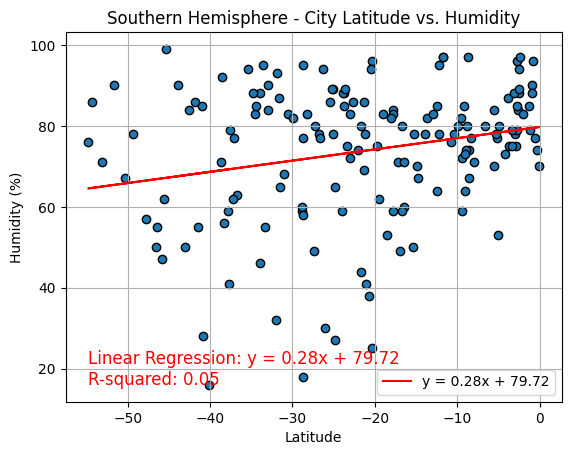

In [20]:
# Linear regression on Southern Hemisphere - Humidity vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Southern Hemisphere - City Latitude vs. Humidity",
                       "Latitude", "Humidity (%)",
                       "output_data/Southern_Hemi_Regression_Humidity.png")


**Discussion about the linear relationship:** moderate positive correlation

### Cloudiness vs. Latitude Linear Regression Plot

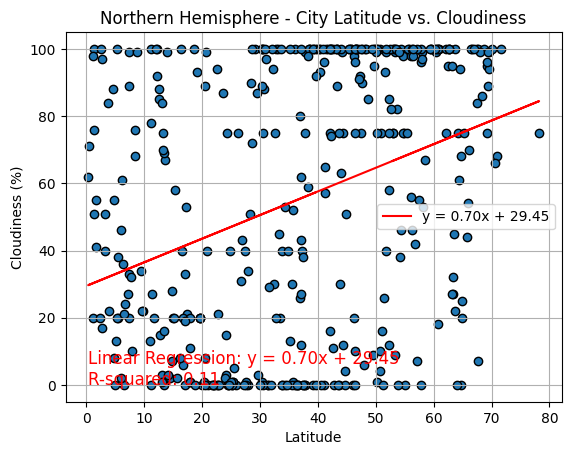

In [21]:
# Linear regression on Northern Hemisphere - Cloudiness vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Northern Hemisphere - City Latitude vs. Cloudiness",
                       "Latitude", "Cloudiness (%)",
                       "output_data/Northern_Hemi_Regression_Cloudiness.png")


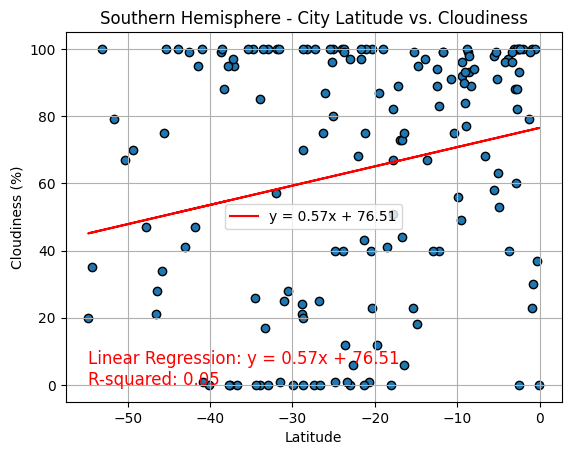

In [22]:
# Linear regression on Southern Hemisphere - Cloudiness vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Southern Hemisphere - City Latitude vs. Cloudiness",
                       "Latitude", "Cloudiness (%)",
                       "output_data/Southern_Hemi_Regression_Cloudiness.png")


**Discussion about the linear relationship:** moderate positive correlation

### Wind Speed vs. Latitude Linear Regression Plot

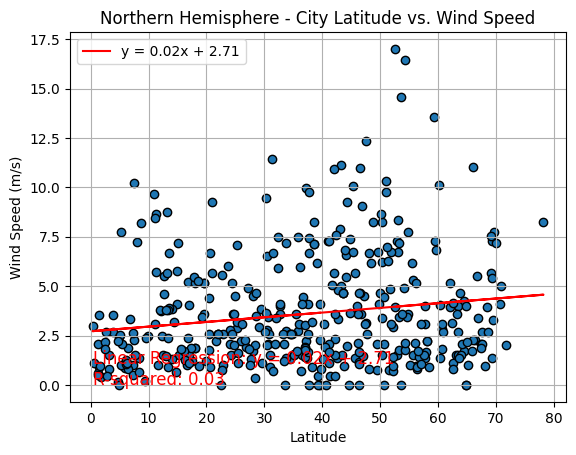

In [23]:
# Linear regression on Northern Hemisphere - Wind Speed vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Northern Hemisphere - City Latitude vs. Wind Speed",
                       "Latitude", "Wind Speed (m/s)",
                       "output_data/Northern_Hemi_Regression_Wind_Speed.png")


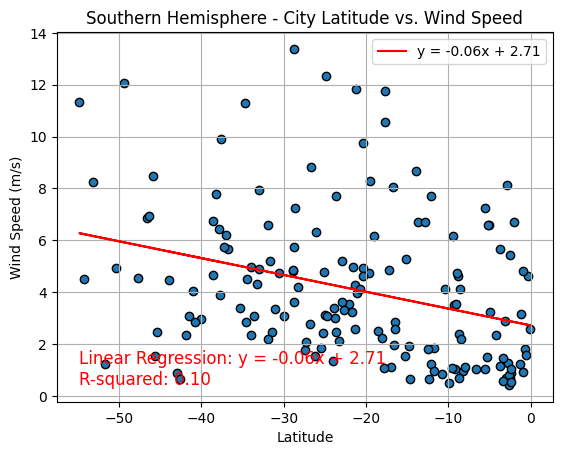

In [24]:
# Linear regression on Southern Hemisphere - Wind Speed vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Southern Hemisphere - City Latitude vs. Wind Speed",
                       "Latitude", "Wind Speed (m/s)",
                       "output_data/Southern_Hemi_Regression_Wind_Speed.png")


**Discussion about the linear relationship:** moderate negative correlation